# Ray Path Visualization: 2D (ObsPy) + 3D (seisray)

Simple demo showing 2D plots with ObsPy and 3D plots with seisray.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.taup import TauPyModel
from obspy.geodetics import gps2dist_azimuth, locations2degrees
from seisray import Earth3DVisualizer

In [ ]:
# Setup: Tokyo to New York using ObsPy directly
model = TauPyModel(model="iasp91")
source_lat, source_lon = 35.6762, 139.6503  # Tokyo
receiver_lat, receiver_lon = 40.7128, -74.0060  # New York
source_depth_km = 10.0

# Calculate distance
distance_deg = locations2degrees(source_lat, source_lon, receiver_lat, receiver_lon)
print(f"Distance: {distance_deg:.1f}°")

In [3]:
# Get P-wave ray paths
p_rays, _ = tracer.get_ray_paths(
    source_lat=source_lat, source_lon=source_lon, source_depth=source_depth_km,
    receiver_lat=receiver_lat, receiver_lon=receiver_lon, phases=['P']
)

print(f"P-wave travel time: {p_rays[0].time:.1f}s")

P-wave travel time: 814.4s


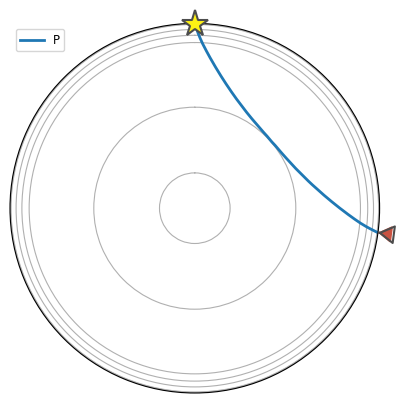

In [8]:
# 2D Visualization with ObsPy
ax = p_rays.plot_rays(plot_type='spherical', legend=True)

In [10]:
# Get ray paths with geographic coordinates for 3D
p_rays_3d, _ = tracer.get_ray_paths(
    source_lat=source_lat, source_lon=source_lon, source_depth=source_depth_km,
    receiver_lat=receiver_lat, receiver_lon=receiver_lon,
    phases=['P', 'PKKP'], output_geographic=True
)

# 3D Visualization with seisray
viz3d = Earth3DVisualizer()
plotter = viz3d.plot_3d_earth_and_rays(
    ray_paths=p_rays_3d,
    source_lat=source_lat, source_lon=source_lon, source_depth=source_depth_km,
    receiver_lat=receiver_lat, receiver_lon=receiver_lon,
    show_earth=True, show_continents=True, notebook=True
)
plotter.show()

Widget(value='<iframe src="http://localhost:45279/index.html?ui=P_0x7f93cb4d9390_2&reconnect=auto" class="pyvi…

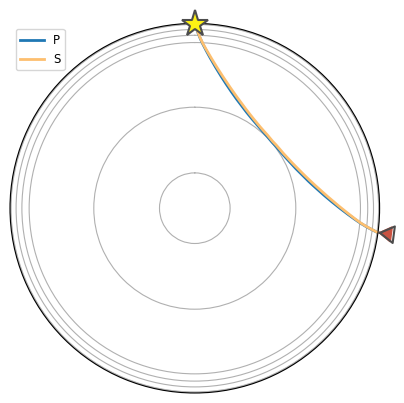

P: 814.4s
S: 1499.5s


In [7]:
# Multi-phase comparison
phases = ['P', 'S']
multi_rays, _ = tracer.get_ray_paths(
    source_lat=source_lat, source_lon=source_lon, source_depth=source_depth_km,
    receiver_lat=receiver_lat, receiver_lon=receiver_lon, phases=phases
)

# 2D multi-phase plot
if multi_rays:
    multi_rays.plot_rays(plot_type='spherical', legend=True)

    for ray in multi_rays:
        print(f"{ray.name}: {ray.time:.1f}s")
else:
    print("No multi-phase rays found")